In [1]:
from traitlets.config.manager import BaseJSONConfigManager
# To make this work, replace path with your own:
# On the command line, type juypter --paths to see where your nbconfig is stored
# Should be in the environment in which you install reveal.js
path = " /Users/Blake/.virtualenvs/cme193/bin/../etc/jupyter"
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
              'theme': 'simple',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
    })

{'start_slideshow_at': 'selected', 'theme': 'simple', 'transition': 'zoom'}

In [2]:
%%HTML 
<link rel="stylesheet" type="text/css" href="custom.css">

# CME 193 
## Introduction to Scientific Python
## Spring 2018

<br>

## Lecture 8-Supplement
-------------
## Web Scraping

# Lecture 8 Contents

- HTML Basics 
- Requests
- Scraping using beautiful soup
- Can also scrape using raw xpaths in the LXML library 


## HTML 

- What is it? HyperText Markup Language for tagging text files to achieve font, color, graphic, and hyperlink effects on World Wide Web pages.

- It details structure, not functionality. Similar to XML in tree structure

- Check out the HTML of a web-page using inspect element

## HTML Example
```html
<html>
    <head>
    </head>
    <body>
        <p class="bold-paragraph">
            Here's a paragraph of text!
            <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
        </p>
        <p class="bold-paragraph extra-large">
            Here's a second paragraph of text!
            <a href="https://www.python.org" class="extra-large">Python</a>
        </p>
    </body>
</html> 
```

### Common HTML Tags

- ```a``` tags: links, tell the browser to render a link to another web page. The href property of the tag determines where the link goes.
- ``` p ``` tag: Paragraph tag, indicates text 
- ``` div ``` tag: indicates a division or area of a page
- ``` table``` tag: creates a table

For a full list of tags lool [here](https://developer.mozilla.org/en-US/docs/Web/HTML/Element)

### Tag attributes

- Before we get into scraping, we need to know about ``` class ``` and ```id``` attributes
- These properties give HTMl elements "names" and make them easier to locate and extract when scraping
- An element can have multiple classes and classes can be shared between elements
- An element can only have one id. 

## Fetching the page: Requests Library

- Whenever you click on a webpage you are typically using a ``` GET ``` request to the websites webserver. 
- You can use the ``` requests``` library (which you will need to pip install) to send requests to the server. 
- Typically you only need to issue ``` GET ``` requests, so I will restrict out analysis. But note that if you must submit credentials, you would be issuing a put request with data 

In [3]:
import requests 
page = 'https://web.stanford.edu/~jacobp2/src/html/exercises.html'
r = requests.get(page)
print(r)

<Response [200]>


## Status codes. 
- As you can see above, the request made had a status code of 200. Every requests returns a status code made by the web-server. These codes indicate what happened with the request
- Types of codes
    * 200 : All is well!
    * 301 : Server is redirecting you
    * 401 : Server does not have you authenticated 
    * 400 : Server indicates you sent a bad request
    * 403 : Forbidden!
    * 404 : Reosource not found 

In [6]:
page = 'https://web.stanford.edu/~jacobp2/src/html/exercises.html'
r = requests.get(page)
print(r.status_code)

200


# Elements of a response 
- response.status_code: Status code
- response.content: Access response as body of bytes, useful for non-text requests
- response.text: get the text of the response
- response.encoding: get the encoding of the response
- see more at [requests](http://www.python-requests.org/en/latest/)


In [8]:
print(r.text)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.1//EN"
  "http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en">
<head>
<meta name="generator" content="jemdoc, see http://jemdoc.jaboc.net/" />
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<link rel="stylesheet" href="../css/jemdoc.css" type="text/css" />
<title>CME 193 - Introduction to Scientific Python</title>
<table summary="Table for page layout." id="tlayout">
<tr valign="top">
<td id="layout-menu">
<div class="menu-category">Overview</div>
<div class="menu-item"><a href="cme193.html">Home</a></div>
<div class="menu-item"><a href="getstarted.html">Getting&nbsp;started</a></div>
<div class="menu-category">Course material</div>
<div class="menu-item"><a href="lectures.html">Lectures</a></div>
<div class="menu-item"><a href="exercises.html" class="current">Exercises</a></div>
<div class="menu-item"><a href="homework.html">Homework</a></div>
<div class="menu-item"><a 

### Querying APIs
- Often when interacting with a search api, you need to pass in query parameters. 
- The API may require that you pass in paramaters into your request. 
- Example: take a look at this [website](http://open-notify.org/Open-Notify-API/) that tracks the location of the international space station
- There api is ``` http://api.open-notify.org/iss-pass ```

In [9]:
# FAILURE
r = requests.get('http://api.open-notify.org/iss-pass.json')
r.status_code

400

In [10]:
# We need to pass in paramaters querying the lat and long
parameters = {'lat':40.71, 'lon': -74}
r = requests.get('http://api.open-notify.org/iss-pass.json', params = parameters)
print(r.status_code)
print(r.text)

200
{
  "message": "success", 
  "request": {
    "altitude": 100, 
    "datetime": 1525196703, 
    "latitude": 40.71, 
    "longitude": -74.0, 
    "passes": 5
  }, 
  "response": [
    {
      "duration": 602, 
      "risetime": 1525250134
    }, 
    {
      "duration": 627, 
      "risetime": 1525255903
    }, 
    {
      "duration": 557, 
      "risetime": 1525261769
    }, 
    {
      "duration": 561, 
      "risetime": 1525267619
    }, 
    {
      "duration": 632, 
      "risetime": 1525273411
    }
  ]
}



# Extracting Information 

- Once we have the page, there are a few different libraries that can be used to extract the relevant information 
- Most of the time what it requires is going into the website, finding the tags of interest, and accessing them within the html. 
- USE THE INSPECT ELEMENT CONSOLE TO FIND THE TAGS 
- Use either ``` BeautifulSoup``` or ``` LXML ``` to extract the info

## Understanding Tree Structure
- HTML is organized as a tree. Each element of the tree, i.e a Tag has children, parents and sibling. Your web browser renders the HTML tree into a DOM (Document object model) and then renders it. 
- In order to understand how to scrape elements of a page, you must first understand how elements are organized on a page. 

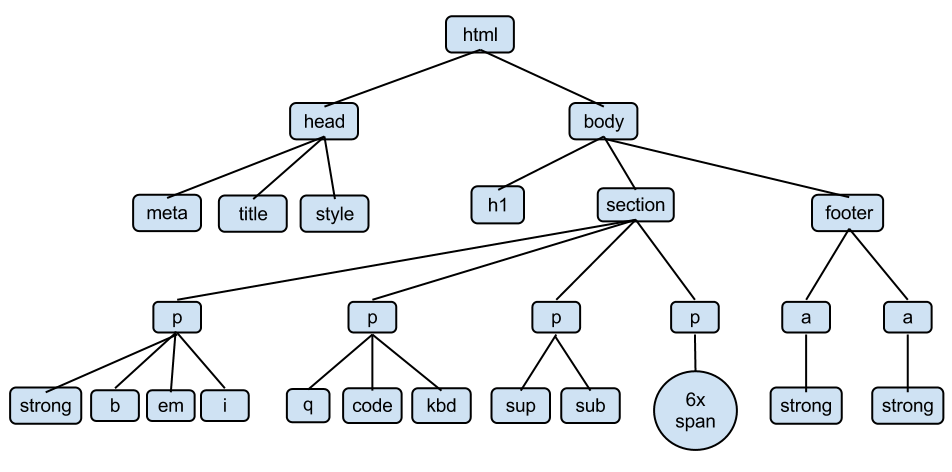

In [11]:
from IPython.display import Image
Image('http://www.openbookproject.net/tutorials/getdown/css/images/lesson4/HTMLDOMTree.png')

## Selecting Elements
- Sometimes you are able to fetch the necessary elements using just the tag and attribute of the element in question. 
- Often though you are able to identify the parent element of the one in question and then must get the content of the children 
- Use the inspect element console

# Beautiful Soup 
- Python library for pulling data out of HTML and XML files. 
- Allows you to navigate the source tree, extract information, and select relevant tags 
- Really powerful

# Basics of Beautiful Soup

- Create a soup object from the html text ``` soup = BeautifulSoup(html_text) ```
- Access tags of the html using ``` soup.tag ```
- Find the elements using ``` soup.find_all(tag, attributes) ```
- Four main types of objects in beautiful soup: Tag, NavigableString, BeautifulSoup, and Comment (we'll talk about Tags and BeautifulSoup objects), but the other two are very straightforward

In [11]:
import requests
import time
from bs4 import BeautifulSoup

In [14]:
html = '''<html>
    <head>
    </head>
    <body>
        <p class="bold-paragraph">
            Here's a paragraph of text!
            <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
        </p>
        <p class="bold-paragraph extra-large">
            Here's a second paragraph of text!
            <a href="https://www.python.org" class="extra-large">Python</a>
        </p>
    </body>
</html>''' 


In [15]:
soup = BeautifulSoup(html, 'html.parser')
soup.contents

[<html>
 <head>
 </head>
 <body>
 <p class="bold-paragraph">
             Here's a paragraph of text!
             <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
 </p>
 <p class="bold-paragraph extra-large">
             Here's a second paragraph of text!
             <a class="extra-large" href="https://www.python.org">Python</a>
 </p>
 </body>
 </html>]

In [16]:
# Tag objects
print(soup.p)
type(soup.p)

<p class="bold-paragraph">
            Here's a paragraph of text!
            <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
</p>


bs4.element.Tag

In [17]:
# Get the attributes
print(soup.p.attrs)
# You can modfiy add or delete attributes as you which 
print(soup.p['class'])

{'class': ['bold-paragraph']}
['bold-paragraph']


In [19]:
# Get the text of a paragraph
soup.p.text

"\n            Here's a paragraph of text!\n            Learn Data Science Online\n"

## Navigating using tag names 
- Simplest way is just using the tag you want  just as we did above
- You can do this recursively 
- All tag's ** direct ** children are availble in a list called ```.contents```
- Can iterate through ** direct ** children using the ```.children``` generator
- Can iterate recursively over children using ``` .descendents ``` of a tag
- Can iterate through siblings by using ```.next_siblings```

In [21]:
print(html)

<html>
    <head>
    </head>
    <body>
        <p class="bold-paragraph">
            Here's a paragraph of text!
            <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
        </p>
        <p class="bold-paragraph extra-large">
            Here's a second paragraph of text!
            <a href="https://www.python.org" class="extra-large">Python</a>
        </p>
    </body>
</html>


In [22]:
soup.p.a

<a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>

In [23]:
# Get children of paragraph tag

paragraph_tag = soup.p
print(paragraph_tag.contents)

["\n            Here's a paragraph of text!\n            ", <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>, '\n']


## Finding and selecting
- Beautiful Soup defines a lot of methods for searching the parse tree, but they’re all very similar. I’m going to spend time explaining the two most popular methods: ```find()``` and ```find_all()```
- ```find_all()``` scans and returns all matching selections in the whole document. ```find()``` is exactly the same as ```find_all()``` except it only returns the first found element. 
- General Syntax:  ``` res = find_all(name, attrs, recursive, string, limit, **kwargs)  ```
- Pass in a filter to ```find``` or ```find_all```

In [24]:
html = '''<html>
    <head>
    </head>
    <body>
        <p class="bold-paragraph", id="first">
            Here's a paragraph of text!
            <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
        </p>
        <p class="bold-paragraph extra-large">
            Here's a second paragraph of text!
            <a href="https://www.python.org" class="extra-large">Python</a>
        </p>
    </body>
</html> ''' 

soup = BeautifulSoup(html, 'html.parser')

## Types of filters 

- String filters denoting tags 

In [25]:
# A string denoting the tak
soup.find_all('p')

[<p ,="" class="bold-paragraph" id="first">
             Here's a paragraph of text!
             <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
 </p>, <p class="bold-paragraph extra-large">
             Here's a second paragraph of text!
             <a class="extra-large" href="https://www.python.org">Python</a>
 </p>]

### A list of string filters 

In [26]:
# a list of tags
soup.find_all(['p', 'a'])

[<p ,="" class="bold-paragraph" id="first">
             Here's a paragraph of text!
             <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
 </p>,
 <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>,
 <p class="bold-paragraph extra-large">
             Here's a second paragraph of text!
             <a class="extra-large" href="https://www.python.org">Python</a>
 </p>,
 <a class="extra-large" href="https://www.python.org">Python</a>]

### Tag names and attributes

In [28]:
# Using tag name AND class attributes
soup.find_all("p", class_ = "bold-paragraph")

[<p ,="" class="bold-paragraph" id="first">
             Here's a paragraph of text!
             <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
 </p>]

In [29]:
# Using tag name AND class AND ID attributes
soup.find_all("p", class_ = "bold-paragraph", id="first")

[<p ,="" class="bold-paragraph" id="first">
             Here's a paragraph of text!
             <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
 </p>]

# ```find_all``` notes

- The additional argument ```limit``` limits the amount of results returned. Since ```find_all()``` returns all the tags and strings that match your filters. This can take a while if the document is large. If you don’t need all the results, you can pass in a number for limit

## Other find methods 

- ```find_parents(), find_parent() ```. Remember how ```find_all()``` and ```find()``` searched the descendents of a tree, these two methods do the opposite, working their way up the tree. 
- ```find_next_siblings(), find_next_sibling() ```. These two method's search over the rest of an element’s siblings in the tree. 
- ```find_previous_siblings(), find_previous_sibling() ```. These two method's search over the element’s siblings that precede it in the tree. 
- ```find_all_next(), find_next() ```. Searches over whatever tags and strings that come after it in the document.
- ```find_all_previous(), find_previous() ```. Searches over whatever tags and strings that come before it in the document.


## Example 
- Lets show what we can do by scraping grant awards on [SBIR](https://www.sbir.gov/sbirsearch/award/all)
- First we'll get all of the links to project descriptions and then we'll get all of the information about each project
- Let's take a look at the page together 

## Breakdown
- ``` get_links ``` function that extracts and returns a list of all the links on a given search page
- ```process_links ``` function that calls ``` get_links ``` for a range of pages of a given year
- ``` scrape_project ``` function that extracts the data of an individual project page 
- ``` get_projects ``` function that calls ``` scrape_project``` on a list of links 

# Step 1: get the links!

In [34]:
# Get the list of links from one search page
def fetch_links(page):
    r = requests.get(page)
    soup = BeautifulSoup(r.text, 'html.parser')
    base_elements = soup.find_all('h3', class_='title')

    links = []
    for elem in base_elements:
        path= elem.find("a")['href']
        links.append( 'https://www.sbir.gov' + path)
    
    return links 


In [31]:
# Let's test it
page = 'https://www.sbir.gov/sbirsearch/award/all'
links = fetch_links(page)
links

[<h3 class="title">
<a href="/sbirsearch/detail/1430463">The Bimodal Ankle: Development and Engineering Validation of a Hydraulic Actuator</a>
</h3>, <h3 class="title">
<a href="/sbirsearch/detail/1430481">Improving Hearing Aid Satisfaction Through Remote Feedback and Settings Adjustments</a>
</h3>, <h3 class="title">
<a href="/sbirsearch/detail/1322101">Development of Fibrin Specific Nuclear Probe to Reduce LVAD Adverse Events</a>
</h3>, <h3 class="title">
<a href="/sbirsearch/detail/1246533">Long non coding RNA signatures to distinguish fibromyalgia syndrome from rheumatic diseases</a>
</h3>, <h3 class="title">
<a href="/sbirsearch/detail/1246661">Optical Dosimeter guided Photodynamic Therapy</a>
</h3>, <h3 class="title">
<a href="/sbirsearch/detail/1305435">The Oaks A Mobile Exercise and Education Program for People with Osteoarthritis of the Knee</a>
</h3>, <h3 class="title">
<a href="/sbirsearch/detail/1323517">Validation of a Performance Based Measure of Functioning in MCI and Ea

['https://www.sbir.gov/sbirsearch/detail/1430463',
 'https://www.sbir.gov/sbirsearch/detail/1430481',
 'https://www.sbir.gov/sbirsearch/detail/1322101',
 'https://www.sbir.gov/sbirsearch/detail/1246533',
 'https://www.sbir.gov/sbirsearch/detail/1246661',
 'https://www.sbir.gov/sbirsearch/detail/1305435',
 'https://www.sbir.gov/sbirsearch/detail/1323517',
 'https://www.sbir.gov/sbirsearch/detail/1164909',
 'https://www.sbir.gov/sbirsearch/detail/1305765',
 'https://www.sbir.gov/sbirsearch/detail/1305787']

In [32]:
# get all the links for multiple pages
def process_links(year, num_pages):
    base_page = 'https://www.sbir.gov/sbirsearch/award/all?'
    links = ['{}page={}&f%5B0%5D=itm_field_award_yr%3A{}'.format(base_page, page, year)
             for page in range(num_pages)]
    all_links = []
    for link in links:
        p_links = fetch_links(link)
        all_links.extend(p_links)
    return all_links


In [35]:
# Let's time this
start = time.time()
results = process_links(2017, 5)
print("Getting 50 links took {} seconds".format(time.time() - start))
results[:10]

Getting 50 links took 2.7690207958221436 seconds


['https://www.sbir.gov/sbirsearch/detail/1216073',
 'https://www.sbir.gov/sbirsearch/detail/1216081',
 'https://www.sbir.gov/sbirsearch/detail/1216089',
 'https://www.sbir.gov/sbirsearch/detail/1216097',
 'https://www.sbir.gov/sbirsearch/detail/1216105',
 'https://www.sbir.gov/sbirsearch/detail/1216113',
 'https://www.sbir.gov/sbirsearch/detail/1216121',
 'https://www.sbir.gov/sbirsearch/detail/1216129',
 'https://www.sbir.gov/sbirsearch/detail/1216137',
 'https://www.sbir.gov/sbirsearch/detail/1216145']

# Step 2: get information for each page!

In [36]:

def get_project_data(page):
    # Get the text
    html_text = requests.get(page).text 
    soup = BeautifulSoup(html_text, 'html.parser')
    # Set the dictionary
    data_dict = {}
    # Project Name
    project_name = soup.find("h1", class_ = "page-header")
    data_dict['Project Name'] = project_name.text
    # Award info 
    award_info = soup.find_all('span', class_='open-label')
    # For each of them set the key-value pairs
    for x in award_info:
        key = x.text.strip(':')
        data_dict[key] = x.find_next_siblings('span')[0].text
    # get final pieces
    data_dict['business_name'] = soup.find(class_='sbc-name-wrapper').text
    data_dict['business_address'] = soup.find(class_='sbc-address-wrapper').text.replace('\n', '').replace('          ', '')
    data_dict['url'] = page
    return data_dict


In [37]:
# Lets test it
page = 'https://www.sbir.gov/sbirsearch/detail/1216073'
get_project_data(page)

{'Agency': 'National Science Foundation',
 'Agency Tracking Number': '1648563',
 'Amount': '$224,912.00',
 'Awards Year': '2017',
 'Branch': 'N/A',
 'Contract': '1648563',
 'DUNS': '079592990',
 'HUBZone Owned': 'Y',
 'Phase': 'Phase I',
 'Program': 'STTR',
 'Project Name': 'STTR Phase I: Autonomous Landing of sUAS onto Moving Platforms',
 'Socially and Economically Disadvantaged': 'N',
 'Solicitation Number': 'N/A',
 'Solicitation Topic Code': 'EW',
 'Solicitation Year': '2016',
 'Woman Owned': 'N',
 'business_address': '710 13TH ST UNIT 307, SAN DIEGO, CA, 92101-7351        ',
 'business_name': 'Planck Aerosystems, Inc.',
 'url': 'https://www.sbir.gov/sbirsearch/detail/1216073'}

In [38]:
# Lets do it for multiple pages
def get_projects(links):
    return list(map(get_project_data, links))


links = process_links(2017, 5)
start = time.time()
res = get_projects(links)
print("Getting project data took {}".format(time.time() - start))

Getting project data took 40.29343628883362


# Speeding this up with parallel processing 

- Python has a rich array of parallel processing libraries. Since this could be a whole lecture in its own right, I will restrict the attention to one object
- ``` from multiprocessing import  Pool ```
- ``` Pool ``` objects represent a pool of parallel workers (maximum number of processors on your computer) that can be assinged to jobs in parallel
- One uses ``` Pool ``` very similarly to how one uses the native ``` map```, i.e. ```pool.map(func, iterable)```
- **MUST REMEBER TO CALL** ```pool.close(); pool.join()``` after the map


In [39]:
from multiprocessing import  Pool
flatten = lambda x: [l for c in x for l in c]
def parallel_fetch_links(page):
    r = requests.get(page)
    soup = BeautifulSoup(r.text, 'html.parser')
    base_elements = soup.find_all('h3', class_='title')
    links = list(map(lambda x: 'https://www.sbir.gov' + x.find("a")['href'], base_elements))
    processed_links = [{'url': x} for x in links]
    return links 


def parallel_process_links(year, num_pages):
    base_page = 'https://www.sbir.gov/sbirsearch/award/all?'
    links = ['{}page={}&f%5B0%5D=itm_field_award_yr%3A{}'.format(base_page, page, year) for page in range(num_pages)]
    all_links = []
    # Process in parallel
    pool = Pool()
    results = pool.map(fetch_links, links)
    # close the pool and join
    pool.close()
    pool.join()

    return flatten(results)


In [40]:
def parallel_get_project_data(page):
    html_text = requests.get(page).text 
    soup = BeautifulSoup(html_text, 'html.parser')
    data_dict = {}
    award_info = soup.find_all('span', class_='open-label')
    for x in award_info:
        key = x.text.strip(':')
        data_dict[key] = x.find_next_siblings('span')[0].text
    data_dict['business_name'] = soup.find(class_='sbc-name-wrapper').text
    data_dict['business_address'] = soup.find(class_='sbc-address-wrapper').text.replace('\n', '').replace('          ', '')
    data_dict['url'] = page
    return data_dict


def parallel_get_projects(links):
    pool = Pool()
    results = pool.map(get_project_data, links)
    pool.close()
    pool.join()

    return results

In [102]:
start = time.time()
code_lst = process_links(2017, 5)
end = time.time()
print("Serial Getting links took: {}".format(end - start))
res = get_projects(code_lst)
print("Serial Getting projects took: {}".format(time.time() - end))

Serial Getting links took: 2.325448751449585
Serial Getting projects took: 16.78061842918396


In [41]:
start = time.time()
code_lst = parallel_process_links(2017, 5)
end = time.time()
print("Parallel Getting links took: {}".format(end - start))
res = parallel_get_projects(code_lst)
print("Parallel Getting projects took: {}".format(time.time() - end))

Parallel Getting links took: 0.869981050491333
Parallel Getting projects took: 3.622122287750244


In [42]:
res

[{'Agency': 'National Science Foundation',
  'Agency Tracking Number': '1648563',
  'Amount': '$224,912.00',
  'Awards Year': '2017',
  'Branch': 'N/A',
  'Contract': '1648563',
  'DUNS': '079592990',
  'HUBZone Owned': 'Y',
  'Phase': 'Phase I',
  'Program': 'STTR',
  'Project Name': 'STTR Phase I: Autonomous Landing of sUAS onto Moving Platforms',
  'Socially and Economically Disadvantaged': 'N',
  'Solicitation Number': 'N/A',
  'Solicitation Topic Code': 'EW',
  'Solicitation Year': '2016',
  'Woman Owned': 'N',
  'business_address': '710 13TH ST UNIT 307, SAN DIEGO, CA, 92101-7351        ',
  'business_name': 'Planck Aerosystems, Inc.',
  'url': 'https://www.sbir.gov/sbirsearch/detail/1216073'},
 {'Agency': 'National Science Foundation',
  'Agency Tracking Number': '1648747',
  'Amount': '$225,000.00',
  'Awards Year': '2017',
  'Branch': 'N/A',
  'Contract': '1648747',
  'DUNS': '832762517',
  'HUBZone Owned': 'Y',
  'Phase': 'Phase I',
  'Program': 'STTR',
  'Project Name': 'STT

#### Now that we have the data, lets make it a dataframe

In [43]:
import pandas as pd
df = pd.DataFrame(res)

In [44]:
df.head()

,Agency,Agency Tracking Number,Amount,Awards Year,Branch,Contract,DUNS,HUBZone Owned,Phase,Program,Project Name,Socially and Economically Disadvantaged,Solicitation Number,Solicitation Topic Code,Solicitation Year,Woman Owned,business_address,business_name,url
0,National Science Foundation,1648563,"$224,912.00",2017,N/A,1648563,079592990,Y,Phase I,STTR,STTR Phase I: Autonomous Landing of sUAS onto ...,N,N/A,EW,2016,N,"710 13TH ST UNIT 307, SAN DIEGO, CA, 92101-735...","Planck Aerosystems, Inc.",https://www.sbir.gov/sbirsearch/detail/1216073
1,National Science Foundation,1648747,"$225,000.00",2017,N/A,1648747,832762517,Y,Phase I,STTR,STTR Phase I: A Low Cost Robotics kit for Elem...,N,N/A,EA,2016,N,"544 MILTENBERGER ST, PITTSBURGH, PA, 15219-597...",BIRDBRAIN TECHNOLOGIES LLC,https://www.sbir.gov/sbirsearch/detail/1216081
2,National Science Foundation,1648748,"$225,000.00",2017,N/A,1648748,080246157,N,Phase I,STTR,STTR Phase I: Hydrogen Storage in Catalyticall...,N,N/A,CT,2016,N,"540 E Miami Street, Indianapolis, IN, 46202-37...","Green Fortress Engineering, Inc",https://www.sbir.gov/sbirsearch/detail/1216089
3,National Science Foundation,1648751,"$224,999.00",2017,N/A,1648751,079582570,N,Phase I,STTR,STTR Phase I: Solar Irradiance Microforecasting,N,N/A,EW,2016,N,"903 Grogans Mill Drive, Cary, NC, 27519-7175 ...",MICROGRID LABS INC.,https://www.sbir.gov/sbirsearch/detail/1216097
4,National Science Foundation,1648753,"$225,000.00",2017,N/A,1648753,080097739,N,Phase I,STTR,STTR Phase I: Development of a Safety System f...,N,N/A,SH,2016,N,"2935 MLK Jr Way, Unit C, Berkeley, CA, 94703-2...",SAFELYYOU INC.,https://www.sbir.gov/sbirsearch/detail/1216105
